In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import os

df = pd.read_csv (r'./dataset/concatenated.csv')
print (df)


      Unnamed: 0       ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0              0  5008804            1             1                1   
1              1  5008806            1             1                1   
2              2  5008808            0             0                1   
3              3  5008812            0             0                1   
4              4  5008815            1             1                1   
...          ...      ...          ...           ...              ...   
9697        9697  5148694            0             0                0   
9698        9698  5149055            0             0                1   
9699        9699  5149729            1             1                1   
9700        9700  5149838            0             0                1   
9701        9701  5150337            1             0                1   

      AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0             427500.0                 4                  

In [47]:
df.describe(include='all')

Unnamed: 0            ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  9702.00000  9.702000e+03  9702.000000   9702.000000      9702.000000   
mean   4850.50000  5.076115e+06     0.348794      0.367656         0.671408   
std    2800.87049  4.080700e+04     0.476613      0.482192         0.469726   
min       0.00000  5.008804e+06     0.000000      0.000000         0.000000   
25%    2425.25000  5.036956e+06     0.000000      0.000000         0.000000   
50%    4850.50000  5.069452e+06     0.000000      0.000000         1.000000   
75%    7275.75000  5.112988e+06     1.000000      1.000000         1.000000   
max    9701.00000  5.150479e+06     1.000000      1.000000         1.000000   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
count      9.702000e+03       9702.000000          9702.000000   
mean       1.812198e+05          2.369099             3.150484   
std        9.930219e+04          1.742738             1.315121   
min        2.700000e+04          0.000000             0.000000   
25%        1.125000e+05          1.000000             1.000000   
50%        1.575000e+05          4.000000             4.000000   
75%        2.250000e+05          4.000000             4.000000   
max        1.575000e+06          4.000000             4.000000   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
count         9702.000000        9702.000000      9702.000000   
mean             1.379509           1.274686         9.220882   
std              0.970264           0.930142         4.274347   
min              0.000000           0.000000         0.000000   
25%              1.000000           1.000000         6.000000   
50%              1.000000           1.000000        10.000000   
75%              1.000000           1.000000        12.000000   
max              4.000000           5.000000        18.000000   

       CNT_FAM_MEMBERS          AGE  YEARS_EMPLOYED       STATUS  \
count      9702.000000  9702.000000     9702.000000  9702.000000   
mean          2.179551    43.781302        5.666518     0.131725   
std           0.906244    11.625742        6.343724     0.338209   
min           1.000000    20.504186        0.000000     0.000000   
25%           2.000000    34.055456        0.928835     0.000000   
50%           2.000000    42.737359        3.761884     0.000000   
75%           3.000000    53.566466        8.202769     0.000000   
max           9.000000    68.863837       43.020733     1.000000   

       MONTHS_BALANCE  
count     9702.000000  
mean        27.263039  
std         16.646883  
min          0.000000  
25%         13.000000  
50%         26.000000  
75%         41.000000  
max         60.000000

In [48]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
profile.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

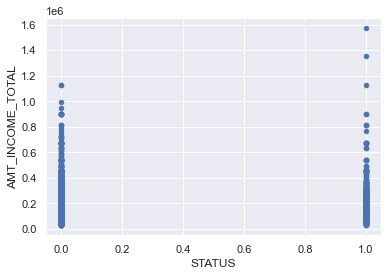

In [50]:
# in our data, status of 0 is "ACCEPT" (no late payments) and status of 1 is "DON'T ACCEPT" (late payments)
# Expecting a negative correlation, for example, between status and income (higher income-> more status 0, lower
# income -> more status 1)
# This isn't evident from our data, however!
%matplotlib inline

df.plot.scatter('STATUS','AMT_INCOME_TOTAL')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


      STATUS  AMT_INCOME_TOTAL
0          1          427500.0
1          1          427500.0
2          0          135000.0
3          1          130500.0
4          1          130500.0
...      ...               ...
8573       1          315000.0
8574       1          157500.0
8575       1          157500.0
8576       1          283500.0
8577       1          112500.0

[8569 rows x 2 columns]


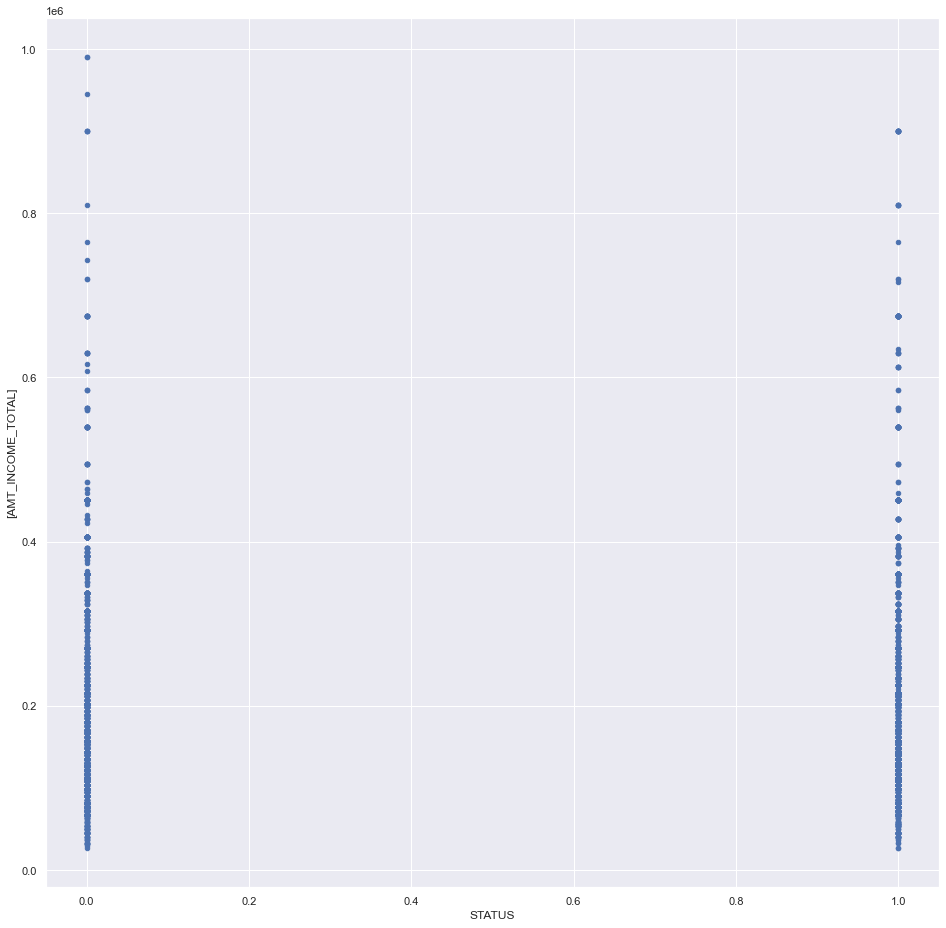

In [45]:
# take data
# data = pd.read_csv("./dataset/concatenated.csv")

df1 = pd.DataFrame(data, columns=["STATUS", "AMT_INCOME_TOTAL"])
# drop incomes over 1 million (outliers)
df1.drop(df[df['AMT_INCOME_TOTAL'] > 1000000].index, inplace = True)
print(df1)

# plot the dataframe
df1.plot(x="STATUS", y=["AMT_INCOME_TOTAL"], kind="scatter", figsize=(16, 16))

# print graph
plt.show()

#save graph
# plt.savefig("income_vs_status.png")



      STATUS  CNT_FAM_MEMBERS
1          1                2
2          0                2
3          1                2
4          1                2
5          1                2
...      ...              ...
8572       1                2
8573       1                2
8574       1                2
8576       1                2
8577       1                1

[7533 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1    1468
1                2    4004
2                3    1283
3                4     670
4                5      92
5                6      11
6                7       3
7                9       2


Text(0, 0.5, '# of respondents')

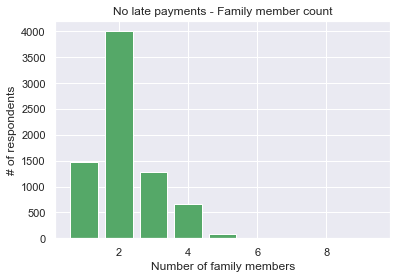

In [51]:
df2 = pd.DataFrame(data, columns=["STATUS", "CNT_FAM_MEMBERS"])
# df2 = pd.DataFrame({'STATUS': status,
                   # 'CNT_FAM_MEMBERS': CNT_FAM_MEMBERS}, index=index)
# df2=(df2[:30000])

# plot all the customers without any late payments
df_no_late_payments = df2.loc[df['STATUS'] == 0]
print(df_no_late_payments)


df_familycount_status0 = df_no_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status0)


X = list(df_familycount_status0.iloc[:, 0])
Y = list(df_familycount_status0.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("No late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")

      STATUS  CNT_FAM_MEMBERS
0          1                2
1          1                2
3          1                2
4          1                2
5          1                2
...      ...              ...
8573       1                2
8574       1                2
8575       1                2
8576       1                2
8577       1                1

[4289 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1     825
1                2    2263
2                3     723
3                4     423
4                5      48
5                6       5
6                9       2


Text(0, 0.5, '# of respondents')

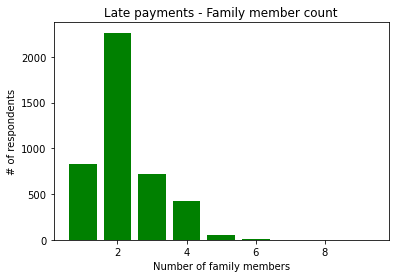

In [9]:
# expecting that late payments/"denies" will have more family members on average, but it 
# doesn't look this way according to the data
# plot all the customers WITH late payments
df_late_payments = df2.loc[df['STATUS'] == 1]
print(df_late_payments)


df_familycount_status1 = df_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status1)


X = list(df_familycount_status1.iloc[:, 0])
Y = list(df_familycount_status1.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")
  


In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv (r'./dataset/concatenated.csv')

def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=df[feature], hue='CODE_GENDER' , data=df)
        plt.legend(loc='best')
        total = len(df[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

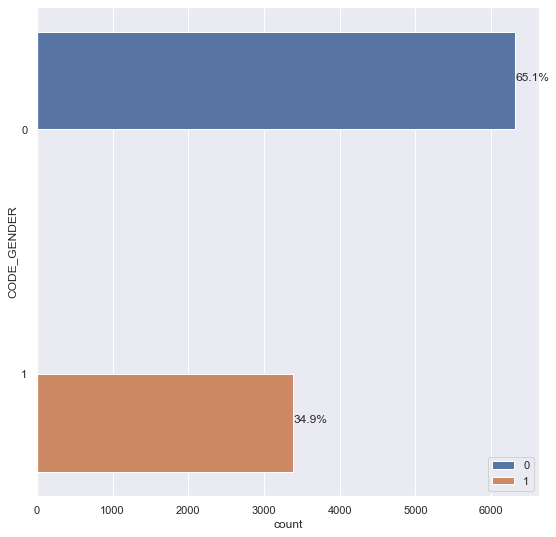

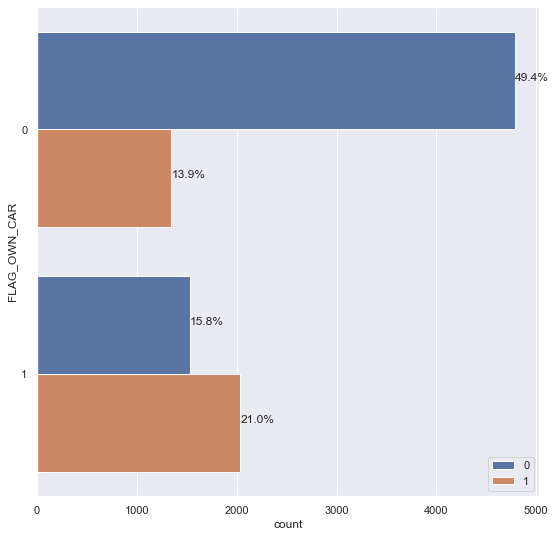

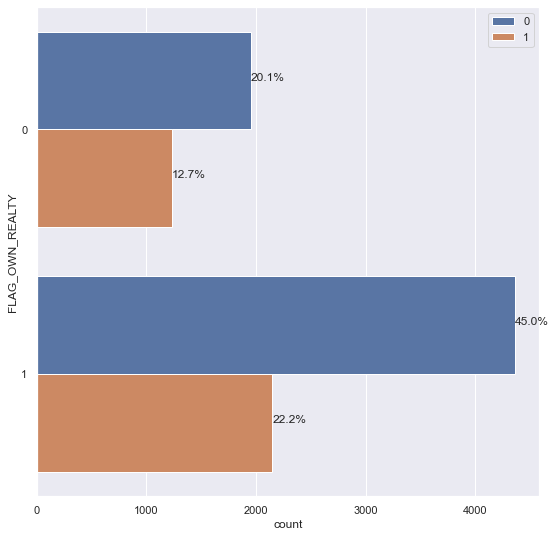

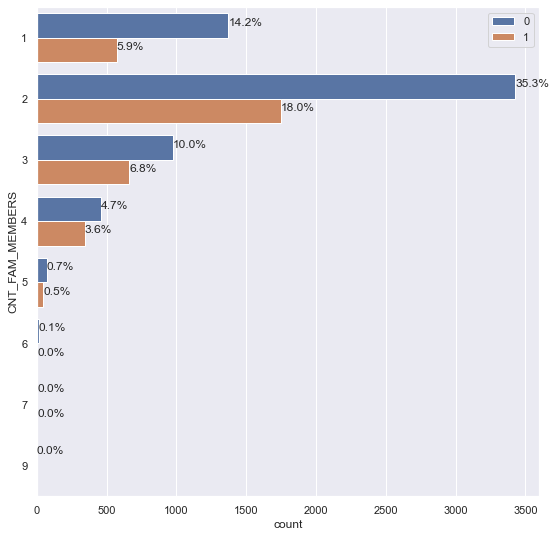

In [53]:
# 0 is women, 1 is men -> data is made up of 65.9% women. 
# visualizations show that in the applicant group, women are less likely than men to own a car, & more likely than men 
# to own realty
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_FAM_MEMBERS'])